<a href="https://colab.research.google.com/github/sumnayak22/Hand-Written-Digit-Recognition/blob/main/Hand_written_digits_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

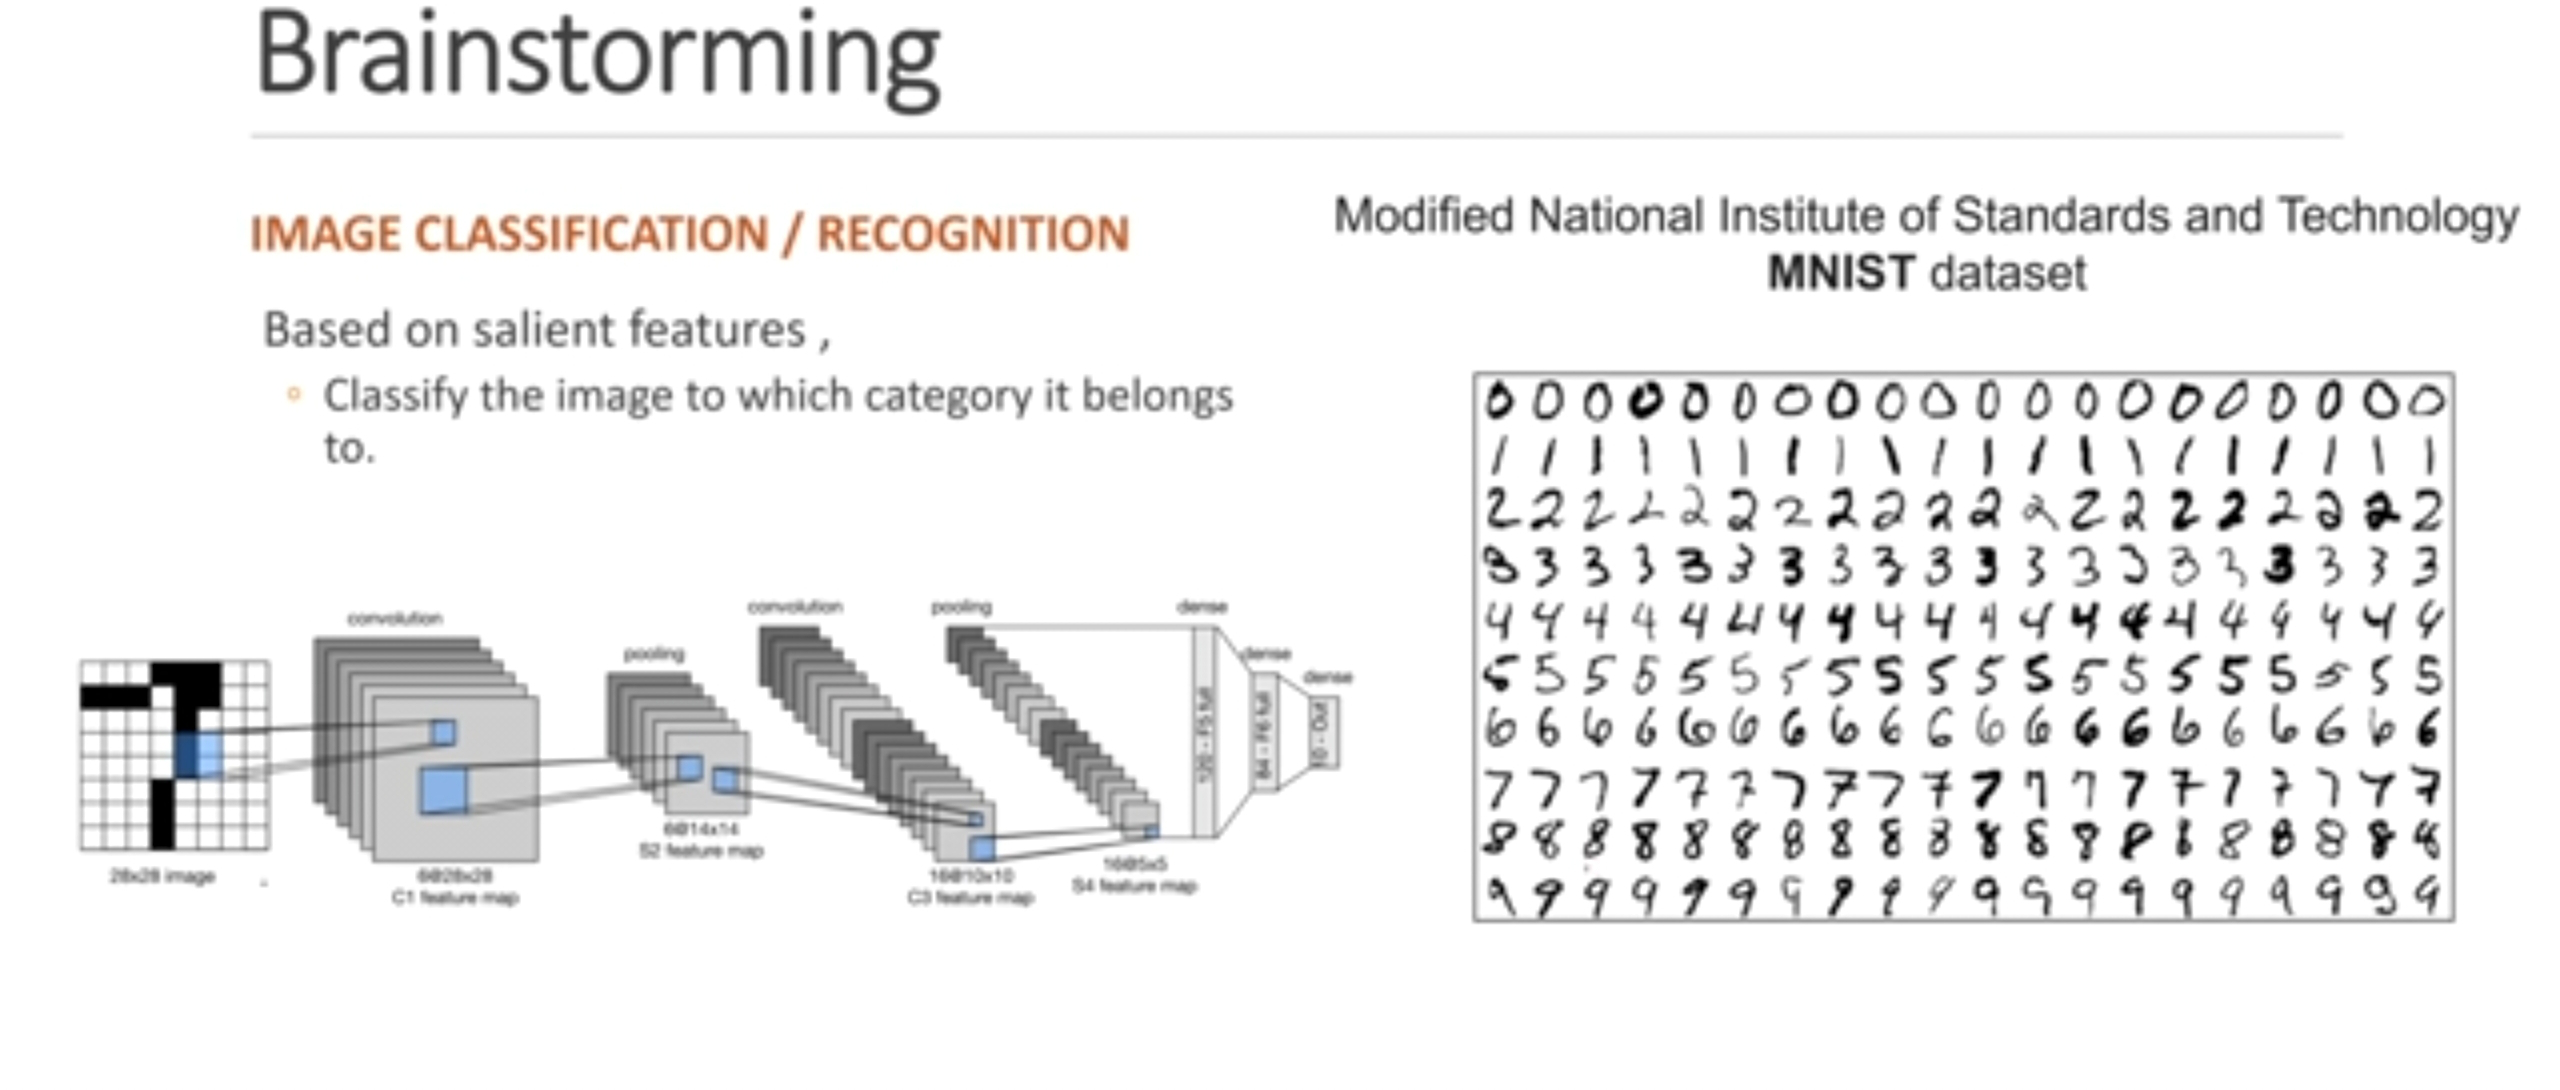

Convolutional Layer --> Feature Extraction
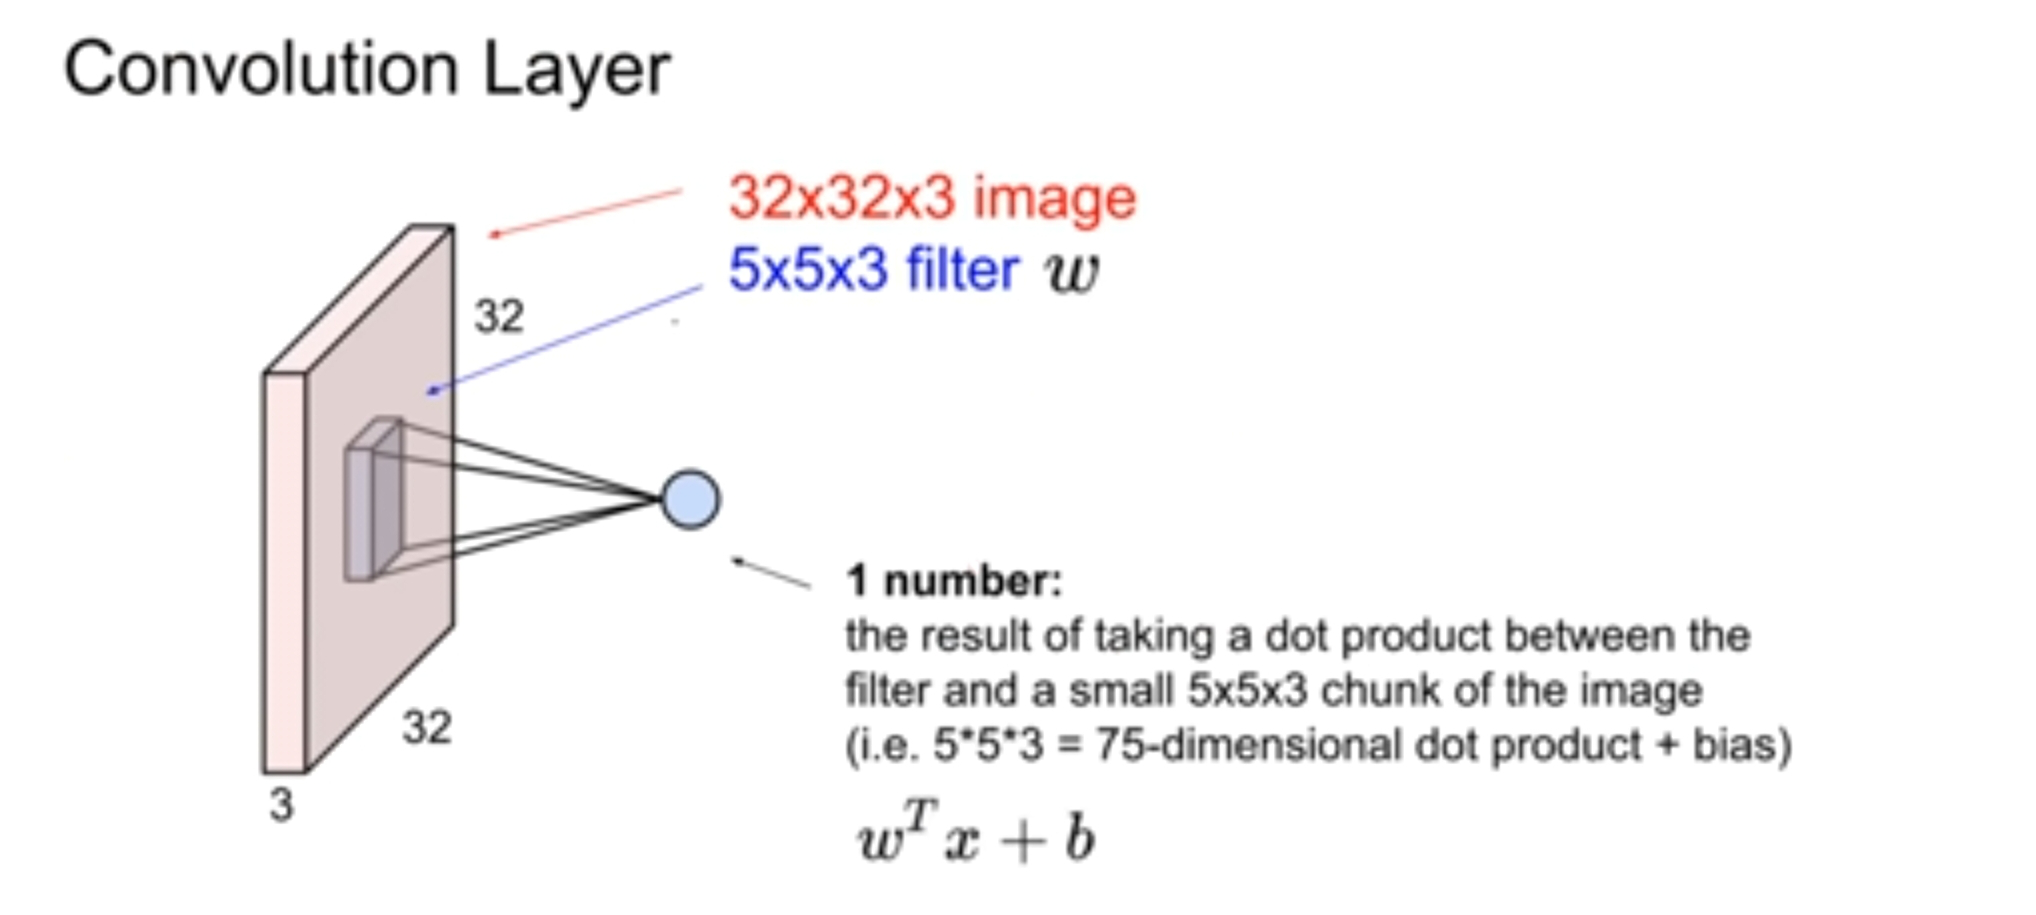

Pooling Layer--> Reducing size

Dense layer --> to sum up aal feature we have extraced so far

Decision or classification layer --> as here we have 0 to 9 digits so the last dense layer must have 10 nurons

**MNIST**


The MNIST dataset, or Modified National Institute of Standards and Technology dataset, is a collection of handwritten digits that's used to train and test image classification systems

**What it contains**

The MNIST dataset contains 70,000 grayscale images of handwritten digits from 0 to 9, each 28 x 28 pixels in size. The images are split into 60,000 training images and 10,000 testing images.

**Grayscale** means that the value of each pixel represents only the intensity information of the light from 0(Black) to 255 (White). Such images typically display only the darkest black to the brightest white.

**Why it's important**

The MNIST dataset is a standard benchmark for evaluating image classification algorithms.

**Loading MNIST dataset**

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist

**Devide into train and test datasets**

In [13]:
(X_train, Y_train),(X_test,Y_test)= mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

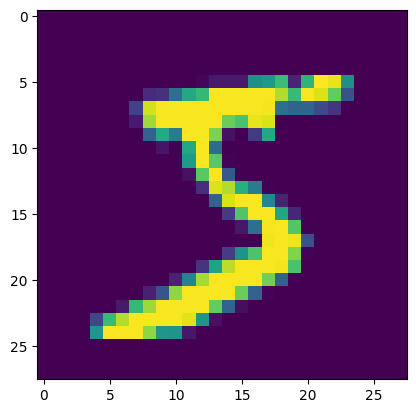

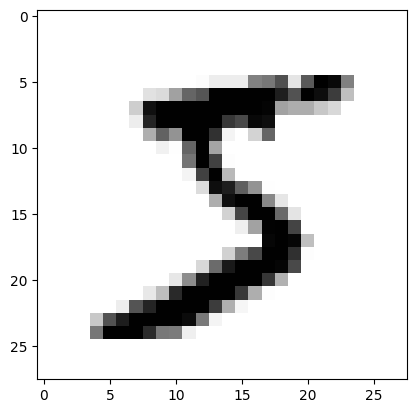

In [19]:

plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

**Checking the value of each pixel Before normalization**

In [22]:
print(X_train[0])
# as we have converted into binary image is reverted in actual so 0 is showing as white and 255 as black

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

The difference betwwen 0 and 255 is huge so will have to scale it down

**Normalization**

Scale down every number  between o to 1.

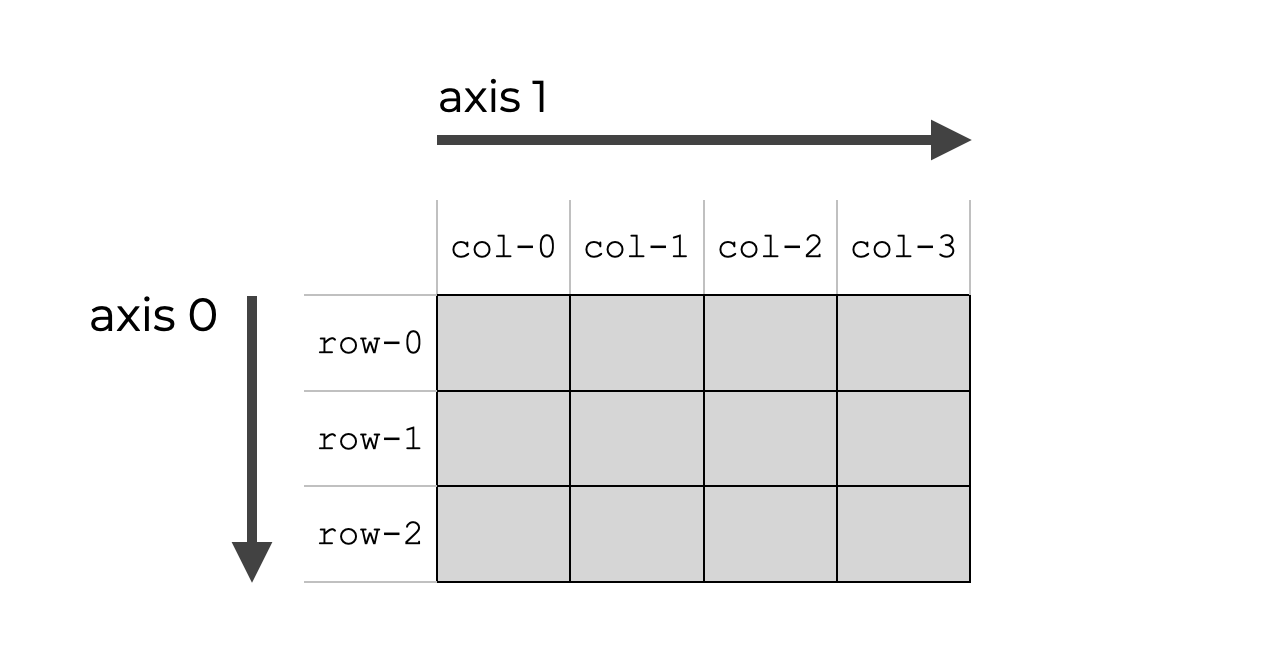

In [23]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [24]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
print(Y_train[0])

5


**Re_Sizing for Convolution Operation**

In [27]:
IMG_SIZE=28
X_train_new= np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) # Increasing 1 Dimension for kernel(filteration) operation
X_test_new= np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)   # Increasing 1 Dimension for kernel(filteration) operation

print("Training samples dimension", X_train_new.shape)
print("Testing samples dimension", X_test_new.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


**Create a Deep Learning Architecture**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

**Creating a nural network now**

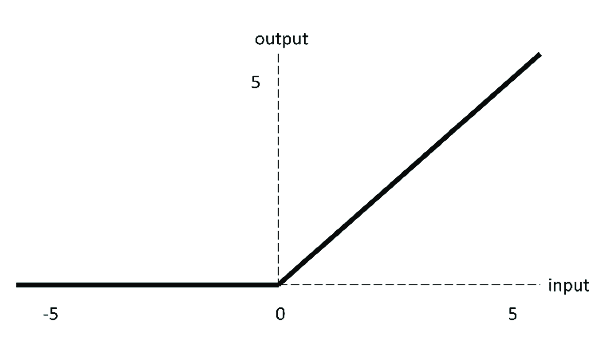

In [37]:

model =Sequential()

### First Convolution Layer (60000, 28, 28, 1)28-3+1 = 26x26
## 3x3 kernels and 1 Convoutional layers have 64 different filters
model.add(Conv2D(64, (3, 3), input_shape=X_train_new.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
## Activation function--> to make it non linear, if any value <0 it will drop those value.. allow only >0 value to move to next layer
## MaxPooling  --> single maximum value of 2x2 , it will get and rest will drop

### Second Convolution Layer  26-3+1 = 24x24
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

### third Convolution Layer   24-3+1 = 22x22
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

## before fully connected layer we should have flatten layer
## fully connected layer 1 # 20x20 =400  2D to 1D
model.add(Flatten())
model.add(Dense(64))  # neural network
model.add(Activation("relu"))

## Each 400 neurons will be connected to each of 64 neurons

## fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))


## fully connected layer 3
## Last dense layer, output must be equal to number of class that is 10
model.add(Dense(10))
model.add(Activation("softmax"))  ## softmax gives --> Class probabilities

## If Binary classification , one neuron in dense layer then activation will be sigmoid



In [38]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
print("Total Trainig Samples = ", len(X_train_new))

Total Trainig Samples =  60000


**Training My Model**

In [45]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
model.fit(X_train_new, Y_train, epochs= 10, validation_split=0.3)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 74s 54ms/step - accuracy: 0.9627 - loss: 0.1172 - val_accuracy: 0.9701 - val_loss: 0.0924
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 72s 55ms/step - accuracy: 0.9765 - loss: 0.0725 - val_accuracy: 0.9771 - val_loss: 0.0728
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9832 - loss: 0.0525 - val_accuracy: 0.9784 - val_loss: 0.0747
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9868 - loss: 0.0425 - val_accuracy: 0.9818 - val_loss: 0.0604
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9907 - loss: 0.0309 - val_accuracy: 0.9830 - val_loss: 0.0589
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9848 - val_loss: 0.0537
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 69s 53ms/step - accuracy: 0.9941 - loss: 0.0172 - val_accuracy: 0.9804 - val_loss: 0.0704
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 69s 52ms/step - accuracy: 0.9941 -

**Evalution on test accuracy**

In [48]:
## Overfitting --> If val_accuracy  <<  accuracy
## solution  Dropout layer: Randomly drop a percentage of neurons during training to prevent co-adaptation.
## Use More Data

test_loss, test_acc = model.evaluate(X_test_new,Y_test)
print("Test loss on 10000 test samples", test_loss)
print("Validation Accuracy on 10000 test samples", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9803 - loss: 0.0839
Test loss on 10000 test samples 0.06920050084590912
Validation Accuracy on 10000 test samples 0.984000027179718


Prediction

In [49]:
predictions= model.predict([X_test_new])
print(predictions)
## These predictions are based on hot encoding so these only arrays , containing softmax


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
[[9.0688877e-14 5.5952129e-13 9.6246691e-12 ... 9.9999994e-01
  7.7846434e-14 2.5636916e-11]
 [1.0374746e-06 4.2452033e-08 9.9999875e-01 ... 4.8675673e-08
  2.9340324e-09 1.0587721e-09]
 [8.6819774e-08 9.9992603e-01 9.1530460e-08 ... 1.1773183e-05
  3.7786197e-07 9.0447662e-07]
 ...
 [3.2738397e-12 1.2888961e-10 1.0980200e-12 ... 3.7941716e-09
  1.2174712e-07 4.3949197e-07]
 [7.3967513e-08 7.9227830e-10 2.8329250e-10 ... 2.0369728e-09
  3.0049249e-10 9.1797020e-08]
 [1.5806984e-06 7.1005118e-08 7.4337651e-05 ... 1.6144091e-09
  5.5603227e-08 1.2628979e-06]]


In [53]:
print(np.argmax(predictions[123]))

6


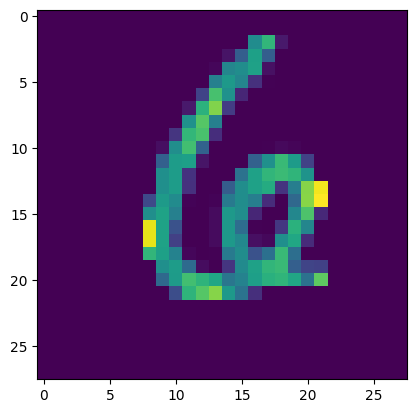

In [52]:
plt.imshow(X_test[123])

In [54]:
import cv2

In [129]:
img= cv2.imread('digit.png')

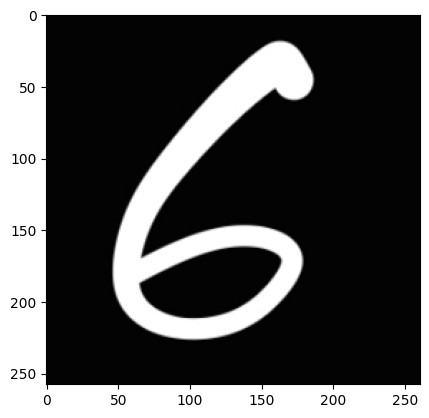

In [130]:
plt.imshow(img)

In [131]:
img.shape

(258, 261, 3)

In [132]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [133]:
gray.shape

(258, 261)

In [134]:
resized =cv2.resize(gray,(28,28),interpolation= cv2.INTER_AREA)

In [135]:
resized.shape

(28, 28)

In [136]:
newimg= tf.keras.utils.normalize(resized, axis =1) ## 0 to 1 scaling

In [137]:
newimg= np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [138]:
newimg.shape

(1, 28, 28, 1)

In [139]:
predictions= model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [140]:
print(np.argmax(predictions))

6
